* DT_FLOAT, DT_INT16,32,64, DT_STRING, DT_BOOL
* rank of a tensor, # of its dimensions
* Shape, rank, dimension number
* tf.shpae, size, rank, reshape, squeez, expand_dims, splice, split, tile, concat, reverse, transpose, gather
* tf.constant, tf.Variable

* Reading data in tensorflow
    * https://www.tensorflow.org/versions/master/how_tos/reading_data/index.html
    * https://github.com/jorditorresBCN/LibroTensorFlow/blob/master/input_data.py

* tf.zeroslike, oneslike, constant, fill
* tf.random_normal, truncated_normal, random_uniform, random_shuffle, set_random_seed
* tf.train.Saver()
* tf.initialize_all_variables (call before run)
* Tensor.eval() or Session.run()
* feed_dict

In [1]:
import numpy as np
num_points = 2000
vectors_set = []

for i in xrange(num_points):
    if np.random.random() > 0.5:
        vectors_set.append([np.random.normal(0.0,0.9), 
                               np.random.normal(0.0, 0.9)])
    else:
        vectors_set.append([np.random.normal(3.0,0.5),
                               np.random.normal(1.0, 0.5)])

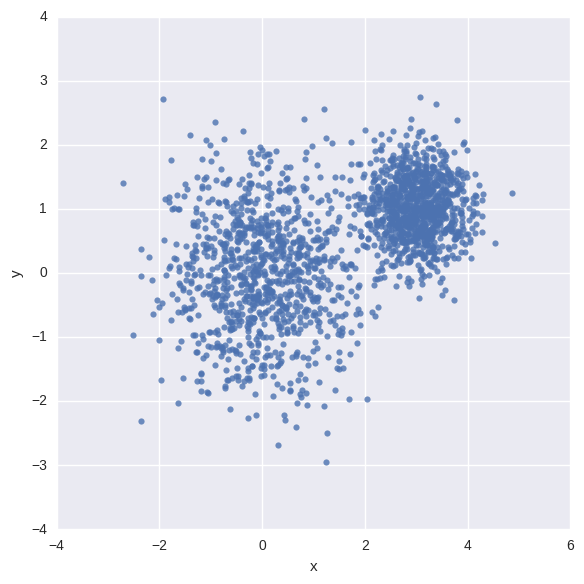

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame({"x":[v[0] for v in vectors_set],
                   "y":[v[1] for v in vectors_set]})

sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

* example
    * https://gist.github.com/narphorium/d06b7ed234287e319f18
    * https://github.com/jorditorresBCN/FirstContactWithTensorFlow

In [7]:
import numpy as np
import tensorflow as tf

vectors = tf.constant(vectors_set)
k = 4

centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))

print(vectors.get_shape())
print(centroids.get_shape())

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

print(expanded_vectors.get_shape())
print(expanded_centroids.get_shape())

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroids)), 2), 0)

means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])), reduction_indices=[1]) for c in xrange(k)])

update_centroids = tf.assign(centroids, means)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)

for step in xrange(100):
    _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignments])

(2000, 2)
(4, 2)
(1, 2000, 2)
(4, 1, 2)


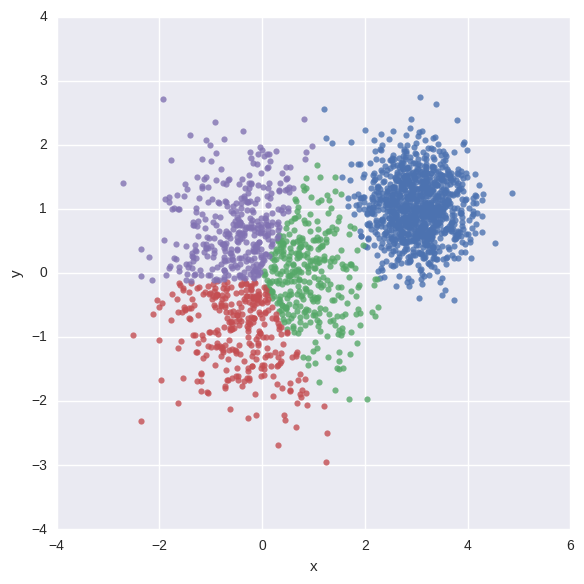

In [5]:
data = {"x":[], "y":[], "cluster":[]}

for i in xrange(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])
    
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df,
           fit_reg=False, size=6,
           hue="cluster", legend=False)

plt.show()

* tf.resude_sum, reduce_prod, reduce_min, reduce_max, reduce_mean
* tf.argmin, argmax, 